# The Sparks-Foundation-Task-1 April'21

# Task 1: Predict the percentage of an student based on the no. of study hours

### Prediction using Supervised ML

#### The objective of this task is to predict the percentage of marks of an student based on the number of study hours. This is a simple linear regression task as it involves just two variables.

Dataset used: http://bit.ly/w-data

### Done by: Rahul Kumar Singh

Language used: Python




In [27]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
path="http://bit.ly/w-data"
s_data=pd.read_csv(path)
print("Data Imported Successfully")

s_data.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### Plotting down the datapoints in 2D graph to find different relationships between the data.

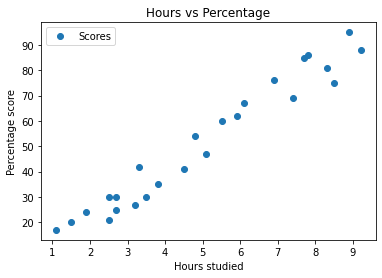

In [29]:
#plotting
s_data.plot(x ='Hours',y='Scores',style='o')
plt.title("Hours vs Percentage")
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

### Linear Regression Model

Now we prepare the data and split it in test data

In [30]:
X=s_data.iloc[:, :-1].values
y=s_data.iloc[:, 1].values

Splitting the dataset into test and training datasets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)

### Training the algorithm

In [32]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

print("Training complete")

Training complete


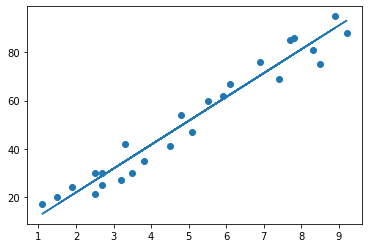

In [33]:
#plotting the regression line
line=regressor.coef_*X+regressor.intercept_

#plotting for the test data
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

#### Making Predictions

Now that we have trained our algorithm, it's time to make some predictions

In [34]:
print(X_test)  #testing data -In Hours
y_pred=regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
#comparing actual vs predicted
df=pd.DataFrame({"Actual": y_test, "Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [36]:
#Now testing with our given task 
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


###  Model Evaluating Matrics

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [38]:
from sklearn import metrics
print("Mean absolute error:",
     metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.183859899002975
